# 🌱 Clasificación de medicamentos recetados: inicio rápido para principiantes

##### **Este proyecto es de: **
- Matin Mahmoudi (https://www.kaggle.com/matinmahmoudi/)

-- Kaggle Link: https://www.kaggle.com/code/matinmahmoudi/drug-classification-quick-start-for-beginners


¡Bienvenido al Proyecto de Clasificación de Medicamentos con Receta! Nuestro objetivo es predecir el tipo de medicamento recetado a los pacientes en función de sus datos de salud. Las características del conjunto de datos incluyen edad, sexo, presión arterial (PA), niveles de colesterol, niveles de sodio (Na) y potasio (K), con el tipo de "fármaco" como nuestra variable objetivo. Exploraremos y aplicaremos los siguientes algoritmos de clasificación:

- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)

## Descripción del proyecto

Este proyecto está estructurado de la siguiente manera:

1. **Exploración de datos**: Profundizaremos en nuestro conjunto de datos, visualizando y comprendiendo la distribución de características y la variable objetivo, verificando valores faltantes y explorando las relaciones entre diferentes características.

2. **Preprocesamiento de datos**: Los datos se prepararán para el modelado mediante pasos como codificar variables categóricas, escalar características numéricas y dividirlos en conjuntos de datos de entrenamiento y prueba.

3. **Construcción de modelos**: Construiremos y entrenaremos cuatro modelos distintos utilizando los algoritmos antes mencionados, cada uno evaluado en los datos de entrenamiento y prueba.

4. **Evaluación del modelo**: El desempeño de cada modelo se evaluará utilizando métricas adecuadas, con un análisis comparativo para discutir sus fortalezas y debilidades relativas.

5. **Conclusión**: Concluiremos con un resumen de nuestros conocimientos y recomendaciones para seguir aprendiendo o investigando.

# 1. Exploración de datos

En este paso inicial, nuestro objetivo será explorar el conjunto de datos a fondo para obtener información sobre las diversas características, su distribución y su relación con la variable objetivo ("Droga"). Nuestro objetivo es comprender mejor los datos para informar nuestros pasos posteriores de preprocesamiento y modelado. Nuestra exploración de datos incluirá las siguientes tareas:

1. **Estadísticas resumidas**: comenzaremos examinando las estadísticas resumidas de nuestro conjunto de datos para comprender las tendencias centrales y la dispersión de las características numéricas y observar la distribución de las características categóricas.

2. **Verificación de valores faltantes**: es crucial identificar los valores faltantes dentro de nuestro conjunto de datos, ya que pueden afectar significativamente el rendimiento de nuestros modelos de aprendizaje automático.

3. **Visualización de distribución de datos**: Visualizaremos la distribución de varias características para comprender sus características e identificar patrones o anomalías. Esto incluye histogramas para características numéricas y diagramas de barras para características categóricas.

4. **Análisis de correlación**: comprender las relaciones entre características numéricas puede proporcionar información sobre la estructura del conjunto de datos. Usaremos matrices de correlación para identificar relaciones potenciales.

5. **Análisis de características frente a objetivos**: por último, exploraremos la relación entre cada característica y la variable objetivo ("fármaco") para identificar posibles influencias y tendencias.

Al final de este paso, deberíamos tener una comprensión integral de nuestro conjunto de datos, estableciendo una base sólida para las siguientes etapas de preprocesamiento y modelado.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Load the dataset
data_path = 'Drug.csv'
data = pd.read_csv(data_path)

# Display the first few entries of the dataset
print(data.head())

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY


In [3]:
# 0. Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [4]:
# 1. Summary Statistics
data.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [5]:
# 2. Missing Values Check
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

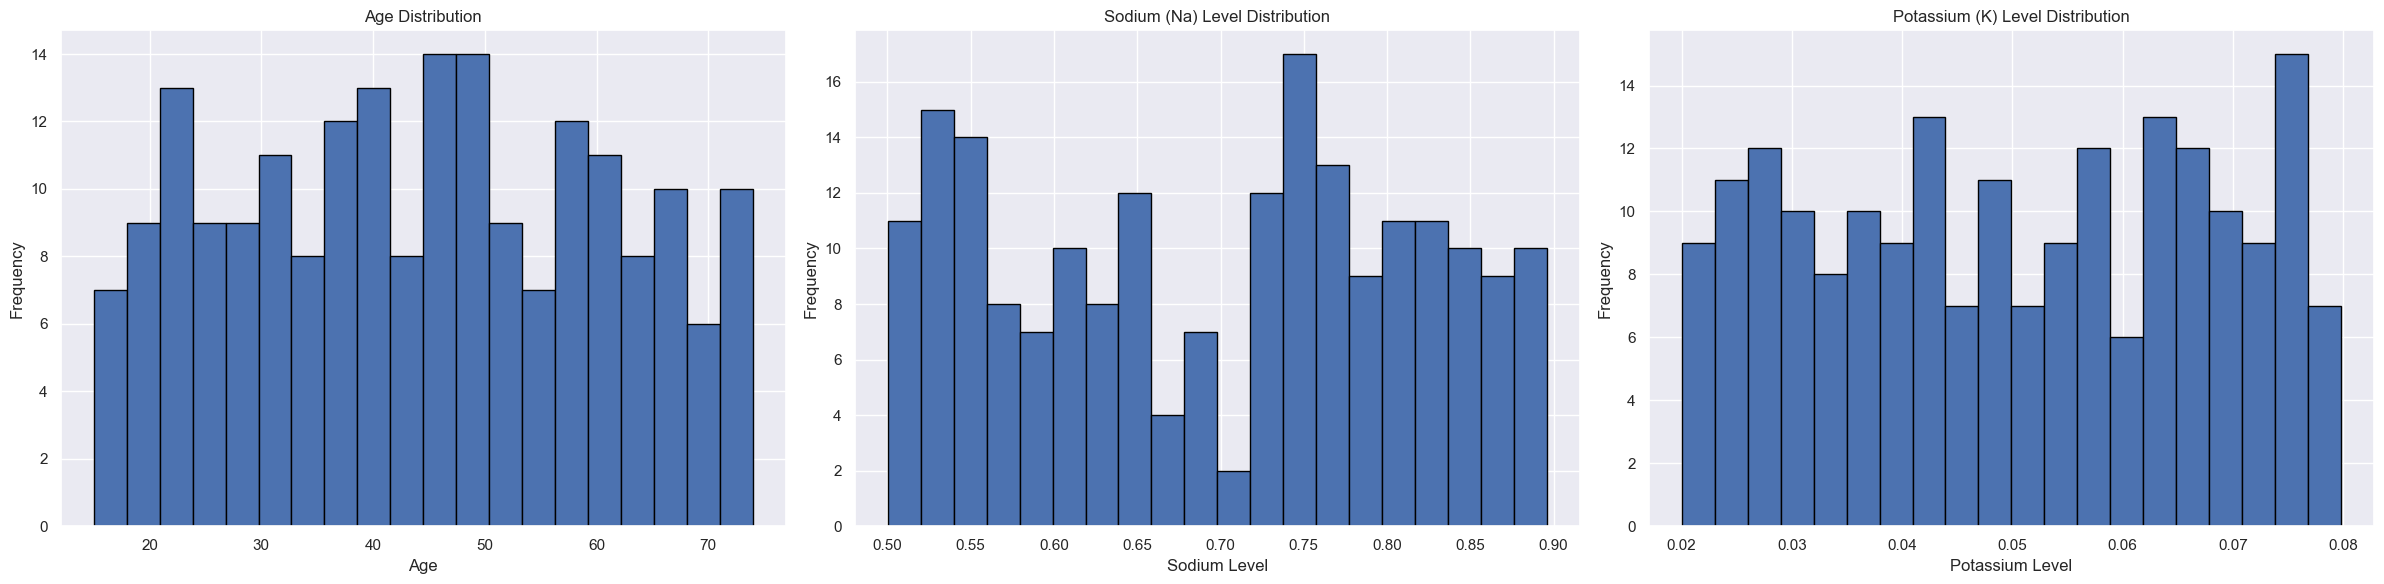

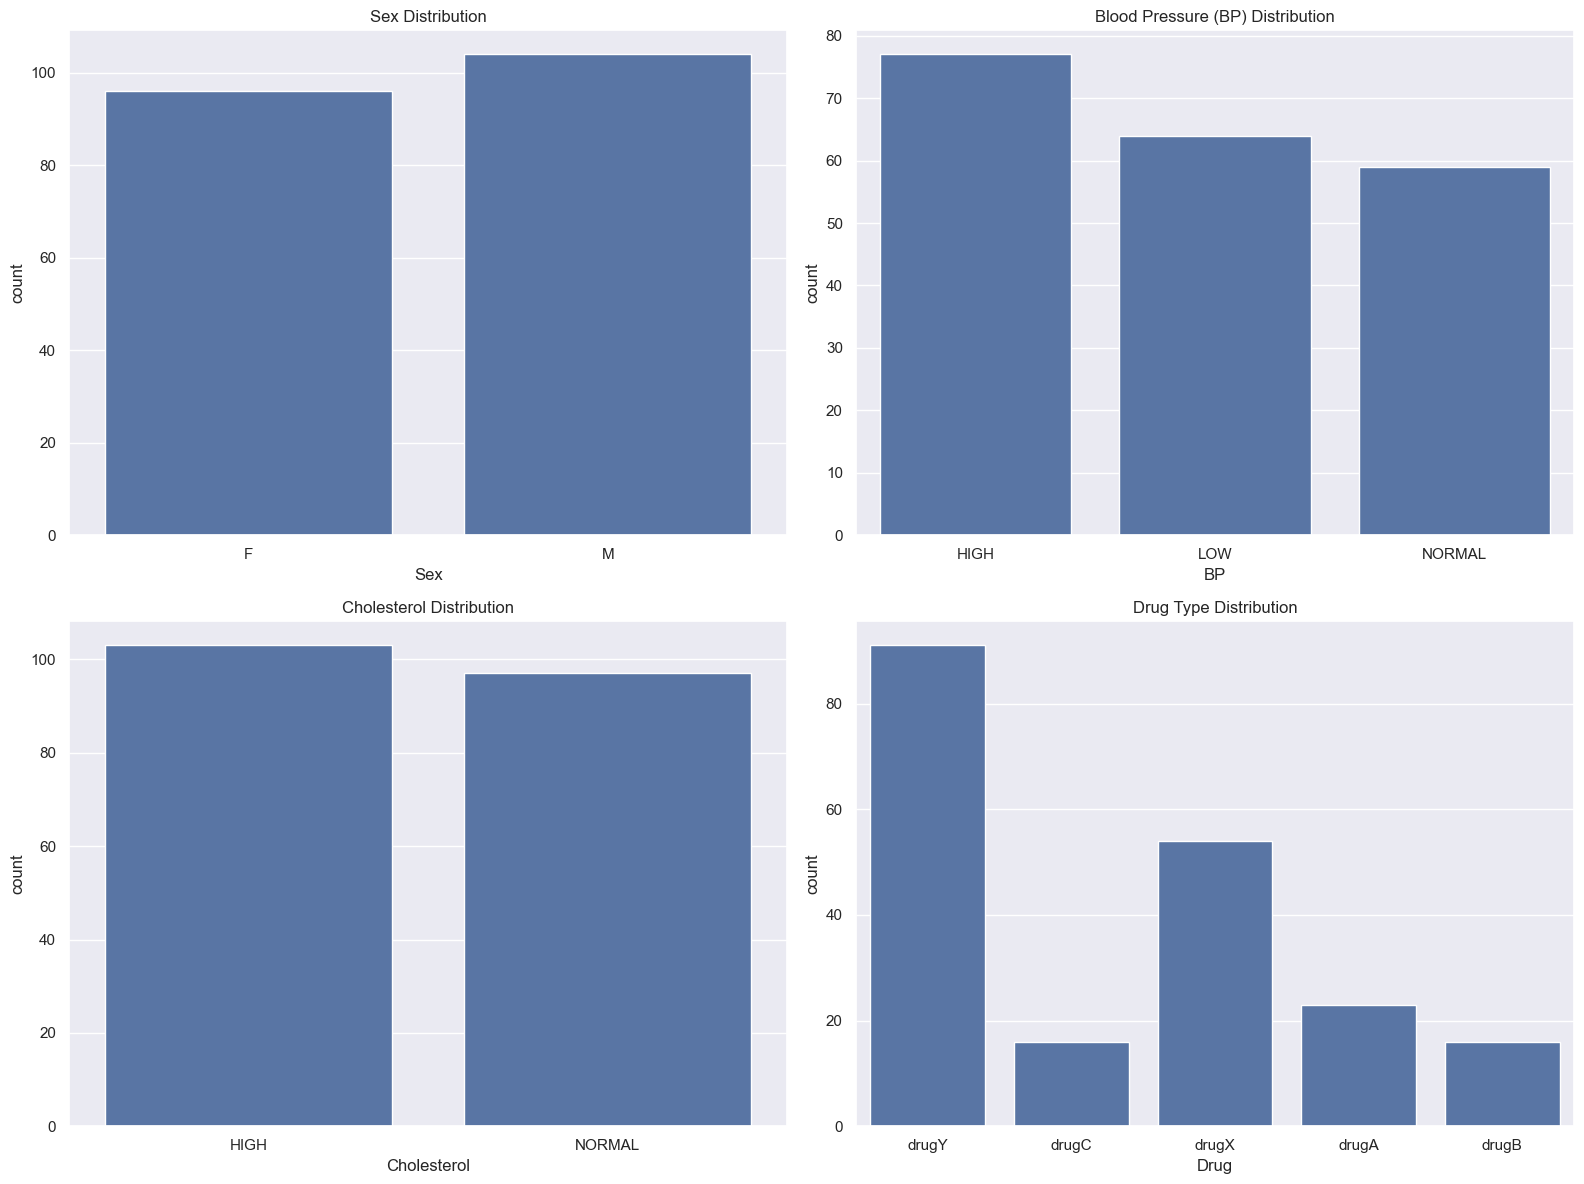

In [6]:
# Numerical Features Distribution
fig, ax = plt.subplots(1, 3, figsize=(24, 6))  # Adjust for 3 subplots
data['Age'].hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

data['Na'].hist(ax=ax[1], bins=20, edgecolor='black')  # Plot for Sodium
ax[1].set_title('Sodium (Na) Level Distribution')
ax[1].set_xlabel('Sodium Level')
ax[1].set_ylabel('Frequency')

data['K'].hist(ax=ax[2], bins=20, edgecolor='black')  # Plot for Potassium
ax[2].set_title('Potassium (K) Level Distribution')
ax[2].set_xlabel('Potassium Level')
ax[2].set_ylabel('Frequency')

plt.tight_layout()


# Categorical Features Distribution
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='Sex', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Sex Distribution')

sns.countplot(x='BP', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Blood Pressure (BP) Distribution')

sns.countplot(x='Cholesterol', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol Distribution')

sns.countplot(x='Drug', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Drug Type Distribution')

plt.tight_layout()


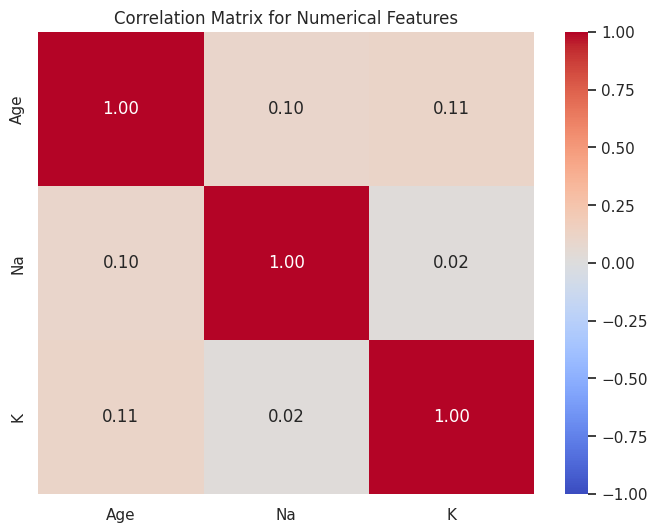

In [ ]:
# 4. Correlation Analysis
# Calculating the correlation matrix for numerical features only
numerical_data = data[['Age', 'Na', 'K']]
correlation_matrix = numerical_data.corr()

# Creating a heatmap for the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

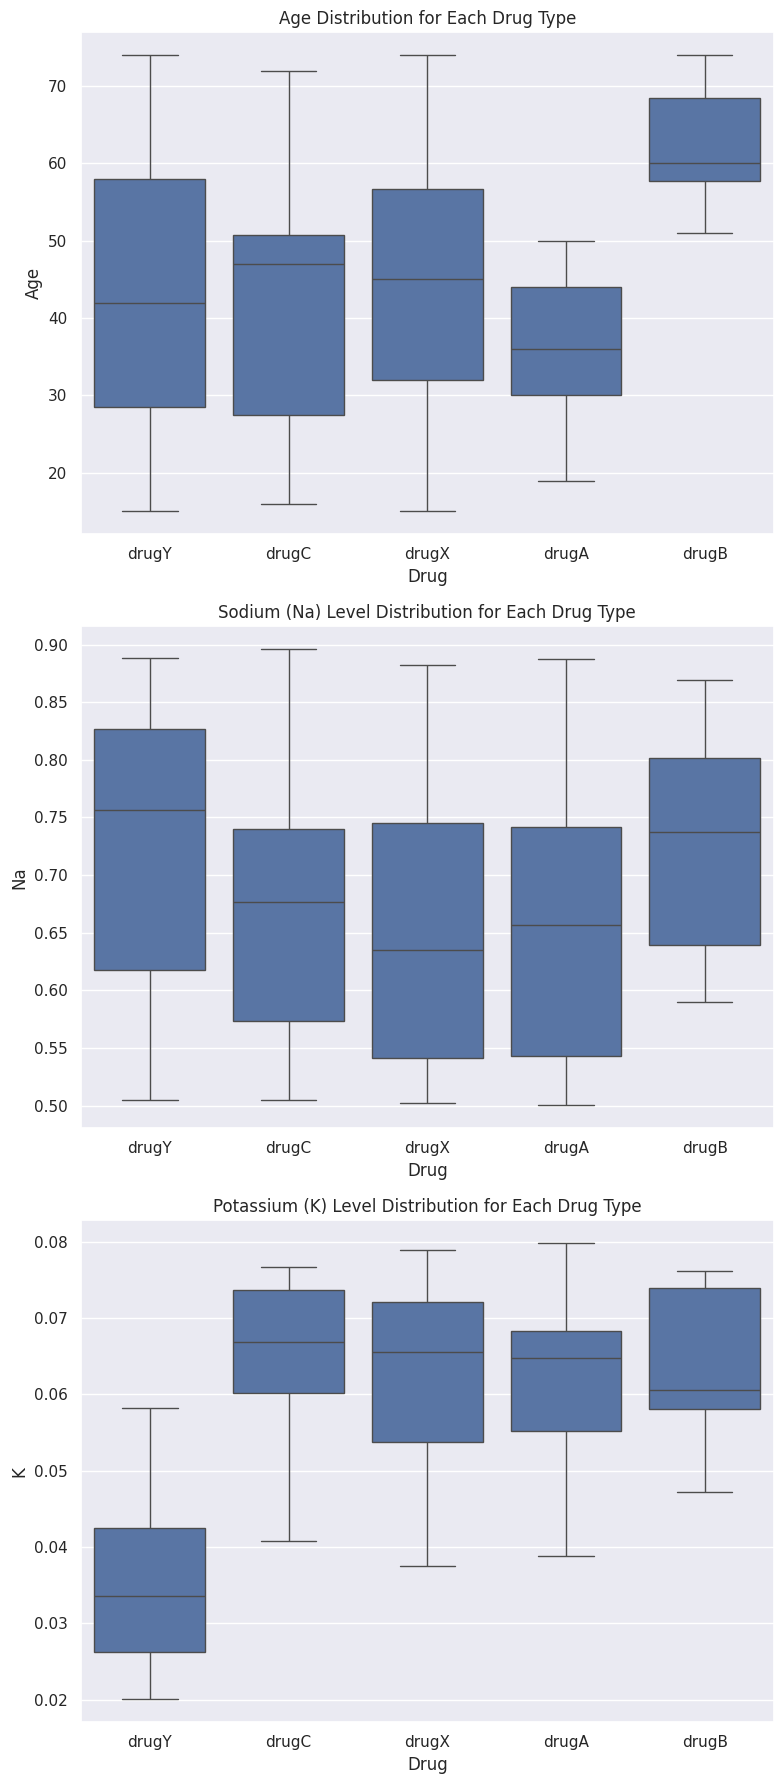

In [ ]:
# 5. Feature vs. Target Analysis
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Boxplot for Age vs Drug
sns.boxplot(x='Drug', y='Age', data=data, ax=ax[0])
ax[0].set_title('Age Distribution for Each Drug Type')

# Boxplot for Na vs Drug
sns.boxplot(x='Drug', y='Na', data=data, ax=ax[1])
ax[1].set_title('Sodium (Na) Level Distribution for Each Drug Type')

# Boxplot for K vs Drug
sns.boxplot(x='Drug', y='K', data=data, ax=ax[2])
ax[2].set_title('Potassium (K) Level Distribution for Each Drug Type')

plt.tight_layout()



# 2. Preprocesamiento de datos

En este paso crucial, preparamos nuestro conjunto de datos para la fase de modelado, asegurándonos de que nuestros datos estén en el formato apropiado para los algoritmos de aprendizaje automático. Las principales tareas en el preprocesamiento de datos incluyen codificar variables categóricas, escalar características numéricas y dividir los datos en conjuntos de entrenamiento y prueba. Aquí hay un desglose de cada tarea:

### Codificación de variables categóricas

Muchos modelos de aprendizaje automático requieren entrada numérica, por lo que las variables categóricas deben convertirse a un formato numérico. Usamos codificación one-hot para transformar las características categóricas ('Sex', 'BP', 'Cholesterol') en vectores binarios, que representan la presencia o ausencia de cada categoría con 0 y 1.

### Dividir el conjunto de datos

Dividimos nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba, lo que nos permite entrenar nuestros modelos en un subconjunto de datos y evaluar su desempeño en un conjunto independiente. Normalmente, asignamos el 80% de los datos para entrenamiento y el 20% para pruebas. Esta división garantiza que nuestro modelo pueda generalizarse bien a datos invisibles.

### Escalado de funciones numéricas

Finalmente, para garantizar que cada característica numérica contribuya por igual a la predicción del modelo, escalamos las características ('Age', 'Na', 'K'). Se aplica una escala estándar para normalizar los datos, estableciendo la media en 0 y la desviación estándar en 1. Este paso ayuda a mejorar la convergencia del modelo y su sensibilidad a los valores de las características.


Al final de estos pasos de preprocesamiento, nuestros datos están limpios, formateados y listos para la etapa de modelado.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the feature set and the target variable
X = data.drop('Drug', axis=1)
y = data['Drug']

# Identifying numerical and categorical features
numerical_features = ['Age', 'Na', 'K']
categorical_features = ['Sex', 'BP', 'Cholesterol']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fitting the transformer on the training data and transforming both the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Construcción de modelos

En esta fase, construiremos y entrenaremos cuatro modelos distintos de aprendizaje automático utilizando los algoritmos que hemos seleccionado: K-vecinos más cercanos (KNN), regresión logística, árboles de decisión y máquinas de vectores de soporte (SVM). Cada modelo se entrenará en nuestro conjunto de datos de entrenamiento y luego se evaluará en función de su rendimiento en el conjunto de datos de prueba. Los pasos para la construcción del modelo son los siguientes:

### K-Nearest Neighbors (KNN)
KNN hace predicciones para un nuevo punto de datos basándose en la etiqueta de mayoría entre sus 'k' vecinos más cercanos en el espacio de características. Es un algoritmo sencillo pero potente, particularmente eficaz para conjuntos de datos donde instancias similares tienen etiquetas similares.

### Logistic Regression
La regresión logística es un modelo estadístico que en su forma básica utiliza una función logística para modelar una variable dependiente binaria, aunque en formas más complejas se puede utilizar para modelar resultados multiclase. Es ampliamente utilizado para tareas de clasificación binaria.

### Decision Trees
Los árboles de decisión son estructuras similares a diagramas de flujo que utilizan métodos de ramificación para ilustrar todos los resultados posibles de una decisión. Son fáciles de entender e interpretar, pero pueden ser propensos a sobreajustarse, especialmente con conjuntos de datos complejos.

### Support Vector Machines (SVM)
Las SVM son un conjunto de métodos de aprendizaje supervisados que se utilizan para clasificación, regresión y detección de valores atípicos. Un modelo SVM es una representación de los ejemplos como puntos en el espacio, mapeados de modo que los ejemplos de las categorías separadas estén divididos por una brecha clara que sea lo más amplia posible.

Después de entrenar cada modelo, evaluaremos su desempeño con los datos de prueba para comprender su efectividad. La métrica de precisión nos ayudará a determinar cuál es el modelo de mejor rendimiento entre los que hemos entrenado.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
decision_tree = DecisionTreeClassifier()
svm = SVC()

# Dictionary to store models and their respective accuracies
models = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm
}

# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_processed, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_processed)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

accuracies

{'K-Nearest Neighbors': 0.875,
 'Logistic Regression': 0.975,
 'Decision Tree': 0.825,
 'Support Vector Machine': 0.9}

# 4. Evaluación del modelo

Una vez que hayamos entrenado nuestros modelos, el siguiente paso crucial es evaluar su desempeño y comprender sus fortalezas y debilidades. Utilizamos principalmente la precisión para evaluar la efectividad de cada modelo, pero otras métricas como la precisión, la recuperación y la puntuación F1 brindan información adicional, especialmente en el contexto de conjuntos de datos desequilibrados. Así es como abordamos la evaluación:

### Evaluación del rendimiento del modelo
- **Accuracy**: Mide la proporción de predicciones correctas sobre el número total de instancias evaluadas. Da una rápida idea del rendimiento general.
- **Precision and Recall**: Importante en escenarios donde los falsos positivos y los falsos negativos tienen implicaciones diferentes.
- **F1-Score**: Media armónica de precisión y recuperación, útil cuando necesitamos un equilibrio entre estas métricas.

### Análisis comparativo
- By examining these metrics side-by-side for each model, we can determine which model performs best for our specific problem and dataset.

### Discusión sobre fortalezas y debilidades
- El rendimiento de cada modelo puede arrojar luz sobre su idoneidad para el problema en cuestión. Por ejemplo, podría preferirse un modelo con alta precisión pero menor recuerdo en situaciones en las que los falsos positivos son más costosos que los falsos negativos.

Este paso de evaluación es crucial para comprender no sólo "¿qué modelo es mejor?" sino "¿qué modelo es mejor en qué circunstancias?", lo que permite una selección más matizada basada en los requisitos del problema.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
# Initializing a dictionary to store evaluation metrics
model_evaluation_metrics = {}

# Iterating over each model to evaluate
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Calculate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)

    # Storing the results
    model_evaluation_metrics[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': classif_report
    }

    # Outputting the results for review
    print(f"{model_name} Evaluation Metrics:")
    print("Confusion Matrix:")
    print(tabulate(conf_matrix, headers=model.classes_, tablefmt='grid'))
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")

K-Nearest Neighbors Evaluation Metrics:
Confusion Matrix:
+---------+---------+---------+---------+---------+
|   drugA |   drugB |   drugC |   drugX |   drugY |
+=========+=========+=========+=========+=========+
|       6 |       0 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       0 |       3 |       0 |       0 |       0 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       2 |       1 |       1 |
+---------+---------+---------+---------+---------+
|       1 |       0 |       0 |       9 |       1 |
+---------+---------+---------+---------+---------+
|       0 |       0 |       0 |       0 |      15 |
+---------+---------+---------+---------+---------+

Classification Report:
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.40      0.57         5
       drugX       0.90  

# 5. Conclusión

En este proyecto, hemos navegado con éxito a través de varias etapas de un flujo de trabajo de aprendizaje automático: exploración de datos, preprocesamiento, construcción de modelos y evaluación. Aplicamos cuatro algoritmos de clasificación diferentes (K-vecinos más cercanos (KNN), regresión logística, árboles de decisión y máquinas de vectores de soporte (SVM)) para predecir el tipo de fármaco en función de la información de los pacientes.

### Resultados clave:
- **Model Performance**: Resuma el desempeño de cada modelo, resaltando qué modelo tuvo un mejor desempeño según las métricas de evaluación (exactitud, precisión, recuperación, puntuación F1) y por qué.
- **Feature Importance**: Analice cualquier información sobre la importancia o la influencia de características específicas en las predicciones del modelo si se realizara dicho análisis.
- **Model Comparison**: Proporcione un análisis comparativo que analice cómo cada modelo tiene sus fortalezas y debilidades en términos de rendimiento, interpretabilidad y eficiencia computacional.

